# SVRI Data Analysis

#### Last updated by: M. Jenkins
#### Date: 06.30.2018

In [3]:
#import libraries
import os
import numpy as np
import csv
from skimage import io
import matplotlib.pyplot as plt

### Load Cells
#### Read .csv file and custom parser: (add .dat parser as well...)

In [130]:
## Consider adding detection for .dat and .csv input formats and building separate parsers for both...more robust
in_path = "../converted_files/"
filename = "06.15-25.18_loadCell_AB.csv"
out_filename_lc = "06.15-28.18_LoadCell_AB.png" #name for saved graph
in_path_and_name = in_path + filename
# hold = sum(1 for line in open(in_path_and_name) if not line.startswith("2018"))
number_samples = sum(1 for line in open(in_path_and_name)) - 4 #figure out how to make this more robust...offset

#LOAD CELLS (AB or CD)
#Custom parser
#open csv file and read values into a list of lists and numpy arrays
with open(in_path_and_name) as input_file:
        # a = numpy.zeros(shape=(5,2))
        all_load_cell_data = []
        cell_A = np.zeros(shape=(number_samples,2))
        cell_B = np.zeros(shape=(number_samples,2))
        j = 0
        for line in input_file:
            newData = [i.strip() for i in line.split(',')]
            newData = [i.strip('"') for i in newData]
#             print(newData)
            all_load_cell_data.append(newData)
            if newData[0].startswith("2"):
#                 print(newData)
                cell_A[j,0] = j # record
                cell_A[j,1] = newData[2] # load cell A raw value
                cell_B[j,0] = j
                cell_B[j,1] = newData[3]
                j += 1

print(j)
print(number_samples)
print(offset)
# print(load_cell_data)
print(all_load_cell_data[1])
print(all_load_cell_data[5])

283
283
287
['TIMESTAMP', 'RECORD', 'load_cell_A', 'load_cell_B']
['2018-06-14 16:00:00', '28', '1323', '1328']


In [138]:
print("Load cell A values:"+str(cell_A[0:3,1]))
print("A records:"+str(cell_A[0:3,0]))

print("Load cell B values:"+str(cell_B[0:3,1]))
print("B records:"+str(cell_B[0:3,0]))


Load cell A values:[1324. 1323. 1324.]
A records:[0. 1. 2.]
Load cell B values:[1329. 1328. 1329.]
B records:[0. 1. 2.]


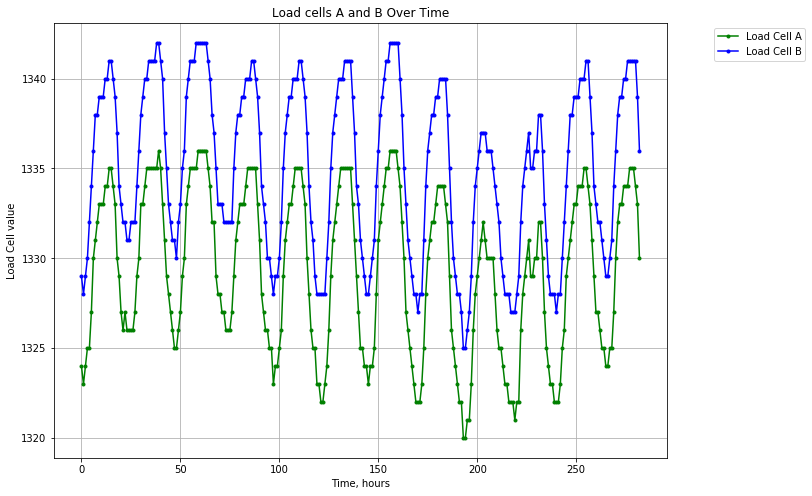

In [140]:
%matplotlib inline

x = cell_A[:,0] # time, 1 hour intervals
y_stack = np.row_stack((cell_A[:,1],cell_B[:,1]))

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y_stack[0,:], label='Load Cell A', color = 'g', marker = '.')
ax1.plot(x, y_stack[1,:], label='Load Cell B', color = 'b', marker = '.')
ax1.legend(loc=2)

# colormap = plt.cm.gist_ncar 
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])

# plt.xticks(x)
plt.xlabel('Time, hours')
plt.ylabel('Mass, kg')
plt.title('Load cells A and B Over Time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig(out_filename_lc)

### RH and Temp Sensors

#### Read .csv file and custom parser: 
(add .dat parser)

In [141]:
## Consider adding detection for .dat and .csv input formats and building separate parsers for both...more robust
in_path = "../converted_files/"
filename = "06.15-25.18_RhTempRef_AB.csv"
out_filename_rh = "06.15-28.18_RH_AB.png" #name for saved RH graph
out_filename_t = "06.15-28.18_Temp_AB.png" #name for saved Temp graph
out_filename_refV = "06.15-28.18_battV.png" #name for saved reference Main battV graph
in_path_and_name = in_path + filename

number_samples = sum(1 for line in open(in_path_and_name)) - 4 #figure out how to make this more robust...offset
# offset = sum(1 for line.startswith())

#RH and TEMP Sensors and Main References (AB or CD) (add detection of AB vs CD for autolabeling)
#Custom parser
#open csv file and read values into a list of lists and numpy arrays
with open(in_path_and_name) as input_file:
        # if "AB" not in filename:
        all_RHTemp_Ref_data = []
        references = np.zeros(shape=(number_samples,3))
        cell_A_RHTemp = np.zeros(shape=(number_samples,7))
        cell_B_RHTemp = np.zeros(shape=(number_samples,7))
        j = 0
        for line in input_file:
            newData = [i.strip() for i in line.split(',')]
            newData = [i.strip('"') for i in newData]
#             print(newData)
            all_RHTemp_Ref_data.append(newData)
            if newData[0].startswith("2"):
#                 print(newData)
                references[j,0] = j # record
                references[j,1] = newData[2] # Batt_volt_Min
                references[j,2] = newData[3] # PTemp
                cell_A_RHTemp[j,0] = j # record
                cell_A_RHTemp[j,1] = newData[4] # Air_T_one_A_Avg
                cell_A_RHTemp[j,2] = newData[5] # RH_one_A_Avg
                cell_A_RHTemp[j,3] = newData[6] # Air_T_two_A_Avg
                cell_A_RHTemp[j,4] = newData[7] # RH_two_A_Avg
                cell_A_RHTemp[j,5] = newData[8] # Air_T_three_A_Avg
                cell_A_RHTemp[j,6] = newData[9] # RH_three_A_Avg
                cell_B_RHTemp[j,0] = j # record
                cell_B_RHTemp[j,1] = newData[10] # Air_T_four_B_Avg
                cell_B_RHTemp[j,2] = newData[11] # RH_four_B_Avg ********FIX********
                cell_B_RHTemp[j,3] = newData[12] # Air_T_five_B_Avg
                cell_B_RHTemp[j,4] = newData[13] # RH_five_B_Avg
                cell_B_RHTemp[j,5] = newData[14] # Air_T_six_B_Avg
                cell_B_RHTemp[j,6] = newData[15] # RH_six_B_Avg
                j += 1

print(j)
print(number_samples)
# print(load_cell_data)
print(all_RHTemp_Ref_data[1])
print(all_RHTemp_Ref_data[5])

567
567
['TIMESTAMP', 'RECORD', 'Batt_volt_Min', 'PTemp', 'Air_T_one_A_Avg', 'RH_one_A_Avg', 'Air_T_two_A_Avg', 'RH_two_A_Avg', 'Air_T_three_A_Avg', 'RH_three_A_Avg', 'Air_T_four_B_Avg', 'Air_Temp_four_B_Avg', 'Air_T_five_B_Avg', 'RH_five_B_Avg', 'Air_T_six_B_Avg', 'RH_six_B_Avg']
['2018-06-14 15:00:00', '54', '12.89', '37.27', '-2.295635', '39.41351', '-1.358917', '38.51474', '-2.192364', '37.64907', '-47.73236', '-1.27024', '-40.22554', '-0.02875773', '-40.20138', '-0.08043119']


In [143]:
print("RH and Temp A test:")
print("Air_T_one_A_Avg:"+str(cell_A_RHTemp[0:3,1]))
print("RH_one_A_Avg:"+str(cell_A_RHTemp[0:3,2]))
print("RH_three_A_Avg:"+str(cell_A_RHTemp[0:3,6]))

print("RH and Temp B test:")
print("Air_T_four_B_Avg:"+str(cell_B_RHTemp[0:3,1]))
print("RH_four_B_Avg:"+str(cell_B_RHTemp[0:3,2]))
print("Air_T_six_B_Avg:"+str(cell_B_RHTemp[0:3,5]))


Cell A test:
Air_T_one_A_Avg:[-3.872335  -2.295635  -0.7553062]
RH_one_A_Avg:[38.7713  39.41351 40.85795]
RH_three_A_Avg:[35.74632 37.64907 38.94916]
Cell B test:
Air_T_four_B_Avg:[-47.32444 -47.73236 -48.01542]
RH_four_B_Avg:[-1.190035 -1.27024  -1.328999]
Air_T_six_B_Avg:[-40.21299 -40.20138 -40.19339]


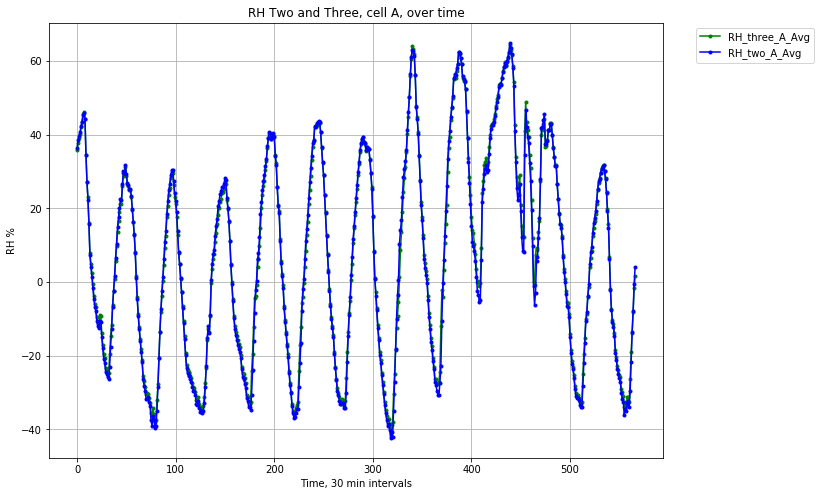

In [144]:
%matplotlib inline

#change y_stack values to see other graphs
# RH_three_A_Avg and RH_two_A_Avg over 30 min intervals
x = cell_A_RHTemp[:,0] # time, 30 min intervals
y_stack = np.row_stack((cell_A_RHTemp[:,6],cell_A_RHTemp[:,4]))

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(x, y_stack[0,:], label='RH_three_A_Avg', color = 'g', marker = '.')
ax1.plot(x, y_stack[1,:], label='RH_two_A_Avg', color = 'b', marker = '.')
ax1.legend(loc=2)

# colormap = plt.cm.gist_ncar 
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])

# plt.xticks(x)
plt.xlabel('Time, 30 min intervals')
plt.ylabel('RH %')
plt.title('RH Two and Three, cell A, over time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig(out_filename_rh)

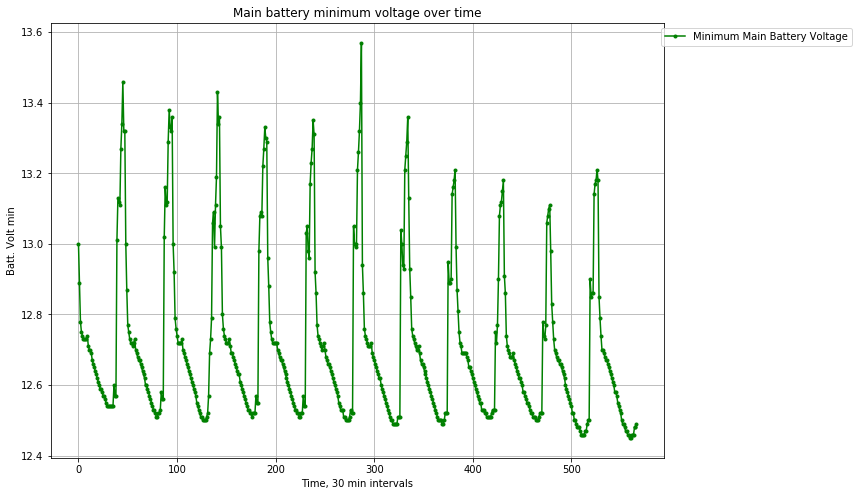

In [149]:
%matplotlib inline

# change z_stack values to see other graphs
# Main battery voltage and Main panel temp over 30 min intervals
v = references[:,0] # time, 30 min intervals
z_stack = np.row_stack((references[:,1],references[:,2]))

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

# ax1.plot(v, z_stack[0,:], label='Minimum Main Battery Voltage', color = 'g', marker = '.')
ax1.plot(v, z_stack[1,:], label='PTemp', color = 'b', marker = '.')
ax1.legend(loc=2)

# colormap = plt.cm.gist_ncar 
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])

# plt.xticks(v)
plt.xlabel('Time, 30 min intervals')
plt.ylabel('Batt. Volt min')
# plt.title('Main battery minimum voltage over time')
plt.title('Main panel temp over time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig(out_filename_refV)

### IRT Target temperatures

#### Read .csv file and custom parser:
(add .dat parser)

In [4]:
## Consider adding detection for .dat and .csv input formats and building separate parsers for both...more robust
in_path = "../converted_files/"
filename = "06.15-25.18_IRT_AB.csv"
out_filename_irt = "06.15-28.18_irtT_AB.png" #name for saved IRT graph
in_path_and_name = in_path + filename

number_samples = sum(1 for line in open(in_path_and_name)) - 4 #figure out how to make this more robust...offset
# offset = sum(1 for line.startswith())

#IRT TARGET TEMP SENSORS (AB or CD);  (add detection of AB vs CD for autolabeling)
#Custom parser
#open csv file and read values into a list of lists and numpy arrays
with open(in_path_and_name) as input_file:
        # if "AB" not in filename:
        all_IRT_data = []
        cell_A_TargT = np.zeros(shape=(number_samples,3))
        cell_B_TargT = np.zeros(shape=(number_samples,3))
        j = 0
        for line in input_file:
            newData = [i.strip() for i in line.split(',')]
            newData = [i.strip('"') for i in newData]
#             print(newData)
            all_IRT_data.append(newData)
            if newData[0].startswith("2"):
#                 print(newData)
                cell_A_TargT[j,0] = j # record
                cell_A_TargT[j,1] = newData[2] # TargT_A_one
                cell_A_TargT[j,2] = newData[3] # TargT_A_two
                cell_B_TargT[j,0] = j # record
                cell_B_TargT[j,1] = newData[4] # TargT_B_three
                cell_B_TargT[j,2] = newData[5] # TargT_B_four
                j += 1

print(j)
print(number_samples)
# print(load_cell_data)
print(all_IRT_data[1])
print(all_IRT_data[5])

3400
3400
['TIMESTAMP', 'RECORD', 'TargTC_one_A', 'TargTC_two_A', 'TargTC_three_B', 'TargTC_four_B']
['2018-06-14 14:25:00', '320', '30.32846', '34.74808', '32.89316', '31.0965']


In [5]:
print("IRT Target Temps A test:")
print("TargT_A_one:"+str(cell_A_TargT[0:3,1]))
print("TargT_A_two:"+str(cell_A_TargT[0:3,2]))

print("IRT Target Temps B test:")
print("TargT_B_three:"+str(cell_B_TargT[0:3,1]))
print("TargT_B_four:"+str(cell_B_TargT[0:3,2]))


IRT Target Temps A test:
TargT_A_one:[30.55237 30.32846 30.79056]
TargT_A_two:[35.05704 34.74808 35.50128]
IRT Target Temps B test:
TargT_B_three:[32.71686 32.89316 33.39407]
TargT_B_four:[30.90018 31.0965  31.40094]


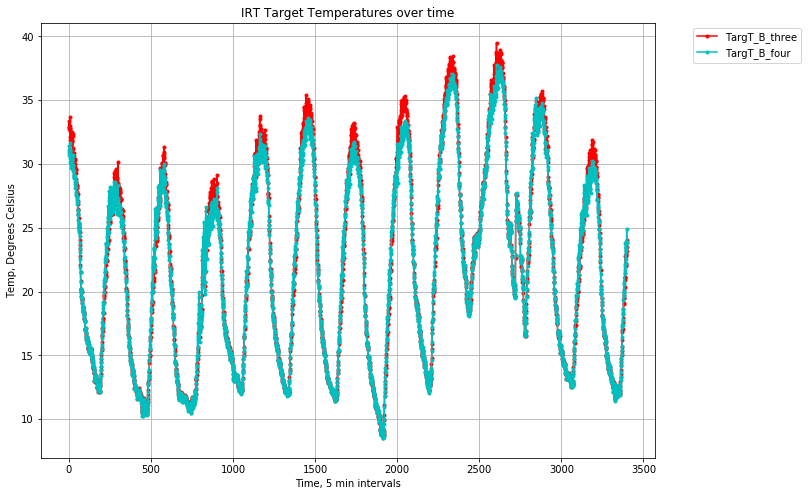

In [11]:
%matplotlib inline

# change w_stack values to see other graphs
# IRT Target Temperatures over 5 minute 
t = cell_A_TargT[:,0] # time, 5 min intervals
w_stack = np.row_stack((cell_A_TargT[:,1],cell_A_TargT[:,2],cell_B_TargT[:,1],cell_B_TargT[:,2]))

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

# ax1.plot(t, w_stack[0,:], label='TargT_A_one', color = 'g', marker = '.')
# ax1.plot(t, w_stack[1,:], label='TargT_A_two', color = 'b', marker = '.')
ax1.plot(t, w_stack[2,:], label='TargT_B_three', color = 'r', marker = '.')
ax1.plot(t, w_stack[3,:], label='TargT_B_four', color = 'c', marker = '.')
ax1.legend(loc=2)

# colormap = plt.cm.gist_ncar 
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])

# plt.xticks(t)
plt.xlabel('Time, 5 min intervals')
plt.ylabel('Temp, Degrees Celsius')
plt.title('IRT Target Temperatures over time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig(out_filename_irt)

### Anemometer wind speed

#### Read .csv file and custom parser:
(add .dat parser)

In [24]:
## Consider adding detection for .dat and .csv input formats and building separate parsers for both...more robust
in_path = "../converted_files/"
filename = "06.15-25.18_anem_AB.csv"
out_filename_anem = "06.15-28.18_anem_AB.png" #name for saved IRT graph
in_path_and_name = in_path + filename

number_samples = sum(1 for line in open(in_path_and_name)) - 4 #figure out how to make this more robust...offset
# offset = sum(1 for line.startswith())

#IRT TARGET TEMP SENSORS (AB or CD);  (add detection of AB vs CD for autolabeling)
#Custom parser
#open csv file and read values into a list of lists and numpy arrays
with open(in_path_and_name) as input_file:
        # if "AB" not in filename:
        all_Anem_data = []
        cell_A_wind = np.zeros(shape=(number_samples,2))
        cell_B_wind = np.zeros(shape=(number_samples,2))
        external_wind = np.zeros(shape=(number_samples,2))
        j = 0
        for line in input_file:
            newData = [i.strip() for i in line.split(',')]
            newData = [i.strip('"') for i in newData]
#             print(newData)
            all_Anem_data.append(newData)
            if newData[0].startswith("2"):
#                 print(newData)
                cell_A_wind[j,0] = j # record
                cell_A_wind[j,1] = newData[2] # wind_one_A
                cell_B_wind[j,0] = j # record
                cell_B_wind[j,1] = newData[3] # wind_two_B
                external_wind[j,0] = j # record
                external_wind[j,1] = newData[4] # wind_external
                j += 1

print(j)
print(number_samples)
# print(load_cell_data)
print(all_Anem_data[1])
print(all_Anem_data[5])

33996
33996
['TIMESTAMP', 'RECORD', 'wind_one_A', 'wind_two_B', 'wind_external']
['2018-06-14 14:19:00', '3189', '8.075245', '9.793936', '7.145217']


In [25]:
print("Internal Wind Speed A test:")
print("wind_one_A:"+str(cell_A_wind[0:3,1]))

print("Internal Wind Speed B test:")
print("wind_two_B:"+str(cell_B_wind[0:3,1]))

print("External Wind test:")
print("external_wind:"+str(external_wind[0:3,1]))

Internal Wind Speed A test:
wind_one_A:[27.18036   8.075245 13.13189 ]
Internal Wind Speed B test:
wind_two_B:[28.9113    9.793936 14.74666 ]
External Wind test:
external_wind:[29.98775   7.145217 12.42329 ]


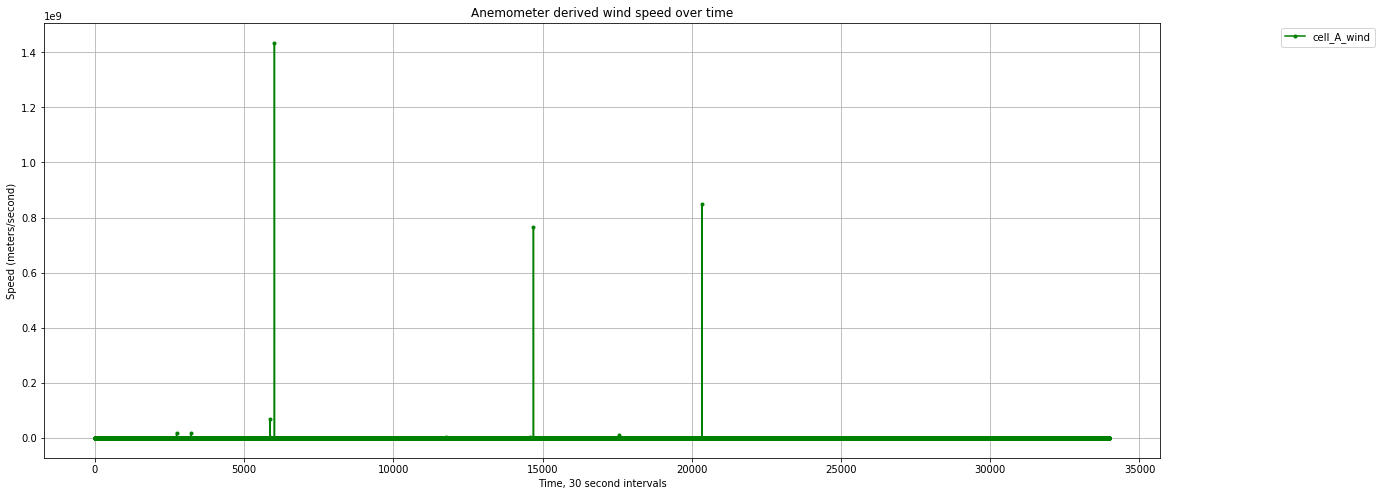

In [28]:
%matplotlib inline

#***FIX REMOVE OUTLIERS USING A FILTER****

# change f_stack values to see other graphs
# Anememometers wind speed over 30 seconds
r = cell_A_wind[:,0] # time, 30 second interval
f_stack = np.row_stack((cell_A_wind[:,1],cell_B_wind[:,1],external_wind[:,1]))

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)

ax1.plot(r, f_stack[0,:], label='cell_A_wind', color = 'g', marker = '.')
# ax1.plot(r, f_stack[1,:], label='cell_B_wind', color = 'b', marker = '.')
# ax1.plot(r, f_stack[2,:], label='external_wind', color = 'r', marker = '.')
ax1.legend(loc=2)

# colormap = plt.cm.gist_ncar 
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])

# plt.xticks(r)
plt.xlabel('Time, 30 second intervals')
plt.ylabel('Speed (meters/second)')
plt.title('Anemometer derived wind speed over time')

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))
ax1.grid('on')

plt.savefig(out_filename_anem)